(100, 8)
   EmployeeID           Name  Age   Department  Salary  YearsAtCompany  \
0           1       John Doe   29        Sales   55000               3   
1           2     Jane Smith   35           HR   60000               7   
2           3  Michael Brown   40  Engineering   80000              10   
3           4    Emily Davis   28    Marketing   65000               5   
4           5  David Johnson   50        Sales   75000              20   

   PerformanceScore Attrition  
0                80        No  
1                85        No  
2                95       Yes  
3                78        No  
4                88       Yes  
       EmployeeID         Age        Salary  YearsAtCompany  PerformanceScore
count  100.000000  100.000000    100.000000      100.000000        100.000000
mean    50.500000   36.570000  72820.000000       10.800000         84.940000
std     29.011492    8.318478  12643.823102        6.361183          6.349771
min      1.000000   25.000000  43000.00000

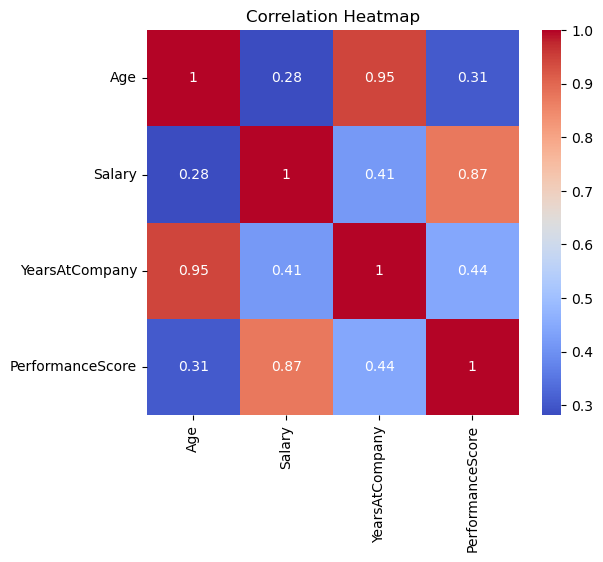

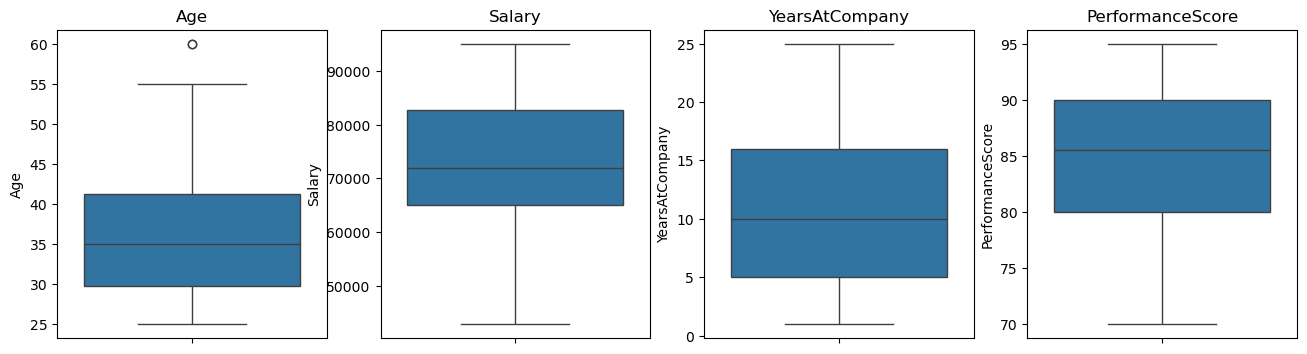


Logistic Regression Results:
Accuracy: 0.65
Precision: 0.6
Recall: 0.375
F1: 0.4615384615384615


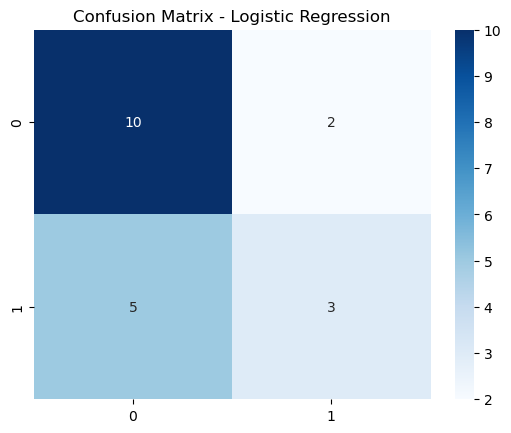


Random Forest Results:
Accuracy: 0.7
Precision: 0.6666666666666666
Recall: 0.5
F1: 0.5714285714285715

Linear Regression Results:
R²: 0.7285323695184434
MSE: 13.861137212388286


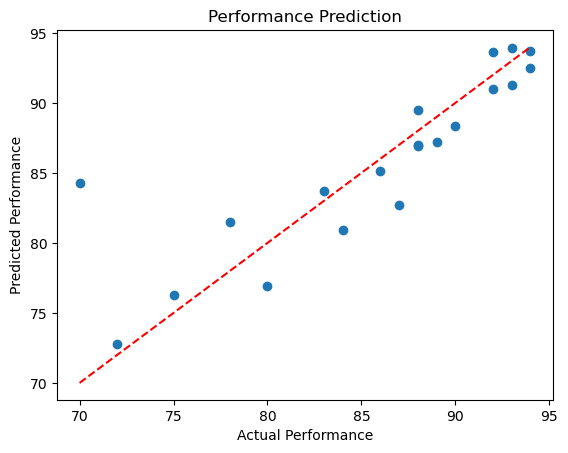

In [3]:
# =========================
# Employee Performance & Retention Analysis (your dataset version)
# =========================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,
    r2_score, mean_squared_error
)
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier

# Load dataset
df = pd.read_csv("/Users/jannatrahman/your_project/rainfall_prediction/data/Tumor_Detection/Employee Performance and Retention Analysis/data/employee_data.csv")

# Quick check
print(df.shape)
print(df.head())

# ===================================
# 1. Exploratory Data Analysis (EDA)
# ===================================
print(df.describe())

# Correlation heatmap
plt.figure(figsize=(6,5))
sns.heatmap(df[["Age","Salary","YearsAtCompany","PerformanceScore"]].corr(), 
            annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Boxplots for outliers
num_cols = ["Age","Salary","YearsAtCompany","PerformanceScore"]
fig, axes = plt.subplots(1, len(num_cols), figsize=(16,4))
for i, col in enumerate(num_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)
plt.show()

# ===================================
# 2. Attrition Prediction (Classification)
# ===================================
X_cls = df.drop(columns=["EmployeeID","Name","Attrition"])
y_cls = df["Attrition"].map({"No":0,"Yes":1})

numeric_features = ["Age","Salary","YearsAtCompany","PerformanceScore"]
categorical_features = ["Department"]

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_features),
    ("cat", OneHotEncoder(), categorical_features)
])

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42, stratify=y_cls
)

# Logistic Regression
logreg = Pipeline([
    ("prep", preprocessor),
    ("clf", LogisticRegression(max_iter=1000))
])
logreg.fit(X_train_c, y_train_c)
y_pred_lr = logreg.predict(X_test_c)

print("\nLogistic Regression Results:")
print("Accuracy:", accuracy_score(y_test_c, y_pred_lr))
print("Precision:", precision_score(y_test_c, y_pred_lr))
print("Recall:", recall_score(y_test_c, y_pred_lr))
print("F1:", f1_score(y_test_c, y_pred_lr))
sns.heatmap(confusion_matrix(y_test_c, y_pred_lr), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Random Forest (for comparison)
rf = Pipeline([
    ("prep", preprocessor),
    ("clf", RandomForestClassifier(n_estimators=200, random_state=42))
])
rf.fit(X_train_c, y_train_c)
y_pred_rf = rf.predict(X_test_c)

print("\nRandom Forest Results:")
print("Accuracy:", accuracy_score(y_test_c, y_pred_rf))
print("Precision:", precision_score(y_test_c, y_pred_rf))
print("Recall:", recall_score(y_test_c, y_pred_rf))
print("F1:", f1_score(y_test_c, y_pred_rf))

# ===================================
# 3. Performance Prediction (Regression)
# ===================================
X_reg = df.drop(columns=["EmployeeID","Name","PerformanceScore"])
y_reg = df["PerformanceScore"]

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

preprocessor_reg = ColumnTransformer([
    ("num", StandardScaler(), ["Age","Salary","YearsAtCompany"]),
    ("cat", OneHotEncoder(), ["Department","Attrition"])
])

linreg = Pipeline([
    ("prep", preprocessor_reg),
    ("reg", LinearRegression())
])
linreg.fit(X_train_r, y_train_r)
y_pred_lr = linreg.predict(X_test_r)

print("\nLinear Regression Results:")
print("R²:", r2_score(y_test_r, y_pred_lr))
print("MSE:", mean_squared_error(y_test_r, y_pred_lr))

plt.scatter(y_test_r, y_pred_lr)
plt.xlabel("Actual Performance")
plt.ylabel("Predicted Performance")
plt.title("Performance Prediction")
plt.plot([y_test_r.min(), y_test_r.max()],
         [y_test_r.min(), y_test_r.max()], 'r--')
plt.show()
